# Analysis of Aire Immuno-fluorescence in thymus

by Pu Zheng

2021.3.19

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

9112


In [2]:
data_folder = r'\\10.245.74.158\Chromatin_NAS_5\Thymus_mouse\191017_Th_Aire_CK5'


'.'

In [9]:
dax_filenames = [os.path.join(data_folder, _fl) 
                 for _fl in os.listdir(data_folder) 
                 if _fl.split(os.extsep)[-1]=='dax']

In [58]:
# load image
fov_id = 5
_filename = dax_filenames[fov_id]
_reader = visual_tools.DaxReader(_filename, verbose=True)
_im = _reader.loadAll()
_reader.close()

In [59]:
im_dict = {}
_start_frame = 0
_order = 1
for _info in os.path.basename(_filename).split('_')[0].split('-')[1:]:
    _ch = str(_info.split('s')[0])
    _len = int(_info.split('s')[1])
    if _order > 0:
        im_dict[_ch] = _im[_start_frame:_start_frame+_len]
    if _order < 0:
        im_dict[_ch] = _im[_start_frame+_len-1:_start_frame-1:-1]
    
    #updates
    _order *= -1
    _start_frame += _len
    print(im_dict[_ch].shape)

(7, 2048, 2048)
(7, 2048, 2048)
(1, 2048, 2048)
(7, 2048, 2048)


In [61]:
list(im_dict.keys())

['750', '635', '545', '408']

In [84]:
viewer.dic_min_max

{0: [1348, 18615], 1: [3018, 8836]}

<IPython.core.display.Javascript object>


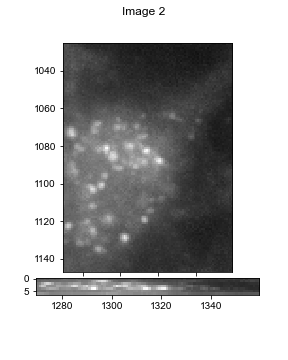

In [83]:
%matplotlib notebook
viewer = visual_tools.imshow_mark_3d_v2(list(im_dict.values()))

In [112]:
reload(ia.figure_tools.image)
from ImageAnalysis3.figure_tools.image import visualize_2d_gaussian, visualize_2d_projection
from ImageAnalysis3.figure_tools.color import black_gradient
from ImageAnalysis3.figure_tools import _dpi, _single_col_width,_double_col_width, _font_size, _ticklabel_size, _ticklabel_width

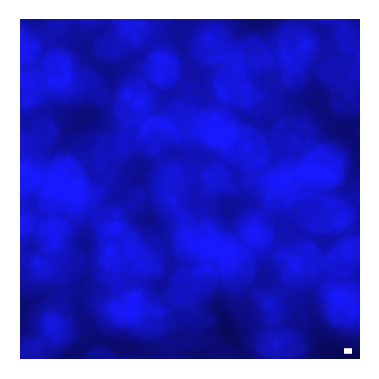

In [88]:
%matplotlib inline


In [129]:
ck5_im = im_dict['750'][:,900:1300,1100:1500]
aire_im = im_dict['635'][:,900:1300,1100:1500]
dapi_im = im_dict['408'][:,900:1300,1100:1500]


In [134]:
figure_folder = os.path.join(data_folder, 'plots')
print(figure_folder)
if not os.path.exists(figure_folder):
    os.makedirs(figure_folder)

\\10.245.74.158\Chromatin_NAS_5\Thymus_mouse\191017_Th_Aire_CK5\plots


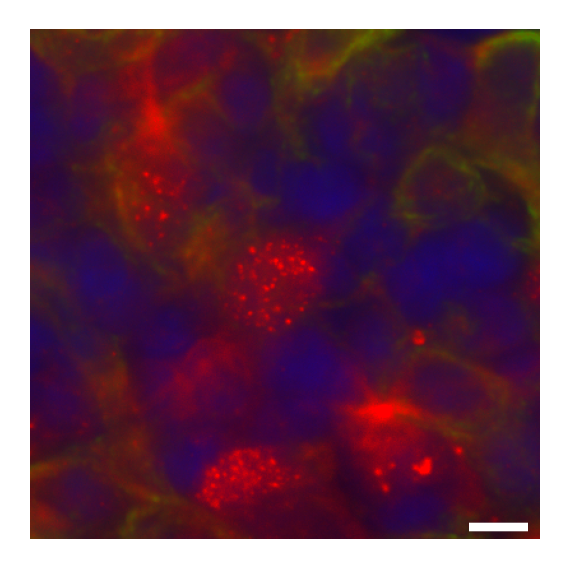

In [151]:

ax = visualize_2d_projection(dapi_im[1:-1], 
                             figure_width=_single_col_width, figure_dpi=300,
                             cmap=black_gradient([0.,0.,1], transparent=False), 
                             color_limits=[200,1000], 
                             add_reference_bar=False,
                             reference_bar_color=[1,1,1])

ax = visualize_2d_projection(ck5_im[1:-1], 
                             ax=ax,
                             figure_width=_single_col_width, figure_dpi=300,
                             projection_type='max',
                             cmap=black_gradient([0,1.,0.], transparent=True),
                             figure_alpha=1,
                             color_limits=[2000,16000], 
                             reference_bar_length=5000/ia._distance_zxy[-1],
                             reference_bar_color=[1,1,1])

ax = visualize_2d_projection(aire_im[1:-1], 
                             ax=ax,
                             figure_width=_single_col_width, figure_dpi=300,
                             projection_type='max',
                             cmap=black_gradient([1,0.,0.], transparent=True),
                             figure_alpha=1,
                             color_limits=[1000,8000], 
                             reference_bar_length=5000/ia._distance_zxy[-1],
                             reference_bar_color=[1,1,1])

#ax.text(340, 320, "Aire", color=[1,0,0], fontsize=7.5)
#ax.text(340, 345, "CK5", color=[0,1,0], fontsize=7.5)
#ax.text(340, 370, "DAPI", color=[0,0,1], fontsize=7.5)

plt.savefig(os.path.join(figure_folder, f'overlayed_IF_fov_{fov_id}.png'), transparent=True)
plt.show()

<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)>